In [109]:
import numpy as np
import cv2
import os
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential, Model, save_model
from tensorflow.keras.callbacks import EarlyStopping

# Read data & structure

In [78]:
# read images as 3D numpy arrays (RGB)
width, height = 200, 200
X = list()
for file in os.listdir(Path('webdev_ig')):
    path = Path('webdev_ig') / file
    temp = Image.open(str(path))
    temp = temp.resize((width, height), Image.ANTIALIAS)
    np_img = np.array(temp)
    X.append(np_img)

In [79]:
X = np.array(X)

In [80]:
# load likes per image
with open(Path('likes.pkl'), 'rb') as f:
        likes = pickle.load(f)

In [81]:
y = list(likes.values())

In [82]:
y = np.array(y)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [84]:
inp = Input(shape=(width, height, 3))
conv1 = Conv2D(32, 4, activation='relu')(inp)
pool1 = MaxPool2D((2,2))(conv1)
conv2 = Conv2D(8, 4, activation='relu')(pool1)
pool2 = MaxPool2D((2,2))(conv2)
flat = Flatten()(pool2)
dense = Dense(8)(flat)
out = Dense(1, activation='linear')(dense)

In [85]:
model = Model(inputs = inp, outputs = out, name="InstaPred")
model.summary()

Model: "InstaPred"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 197, 197, 32)      1568      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 95, 95, 8)         4104      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 47, 47, 8)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 17672)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 14

In [86]:
model.compile(optimizer="Adam", loss="mse", metrics=["mae"])

In [92]:
callback = EarlyStopping(monitor='val_loss', patience=2, verbose=0)

In [96]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=8, callbacks=[callback])

Epoch 1/100
4/4 [==============================] - 1s 249ms/step - loss: 18518.5742 - mae: 99.9825 - val_loss: 4513780.5000 - val_mae: 1473.5625
Epoch 2/100
4/4 [==============================] - 1s 227ms/step - loss: 18231.5332 - mae: 110.0614 - val_loss: 4962574.5000 - val_mae: 1576.8950
Epoch 3/100
4/4 [==============================] - 1s 224ms/step - loss: 16920.2461 - mae: 105.3259 - val_loss: 4781333.5000 - val_mae: 1538.3345


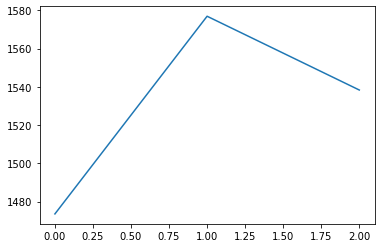

In [107]:
plt.plot(model.history.history['val_mae'])

In [111]:
save_model(model, filepath=Path('model'))

INFO:tensorflow:Assets written to: model\assets
